## Initial setup

In [1]:
# Load all relevant external packages
import numpy as np
import pandas as pd
import networkx as nx
import random
from itertools import combinations
from matplotlib import pyplot as plt

## Step 1: Alternatives

In [2]:
# define alternatives in groups
alternatives = {
    'Envelope Sealing': [
        'Double Glazing', 'Cavity Insulation', 'Ventilation', 'Fenestration', 'Thermal Facades'
    ],
    'Energy Generation': [
        'Solar Panels', 'Solar Cells', 'Wind Turbine', 'Microhydropower'
    ],
    'Equipment Replacement': [
        'New Appliances', 'Electronical Alternatives', 'LED Lighting'
    ],
    'Smart Meters': [
        'Zone Sensors', 'Consumption Recorders'
    ]
}
# define all individual alternatives
all_alts = []
for k, v in alternatives.items():
    all_alts += v

## Step 2: Criteria

In [3]:
# define criteria and subcriteria
criteria = ['Cost', 'GHG Reduction', 'Ease of Installation', 'Aesthetics']
subcriteria = ['Embodied Carbon (tonne CO2e)', 'Operating GHG (g/kWh)']

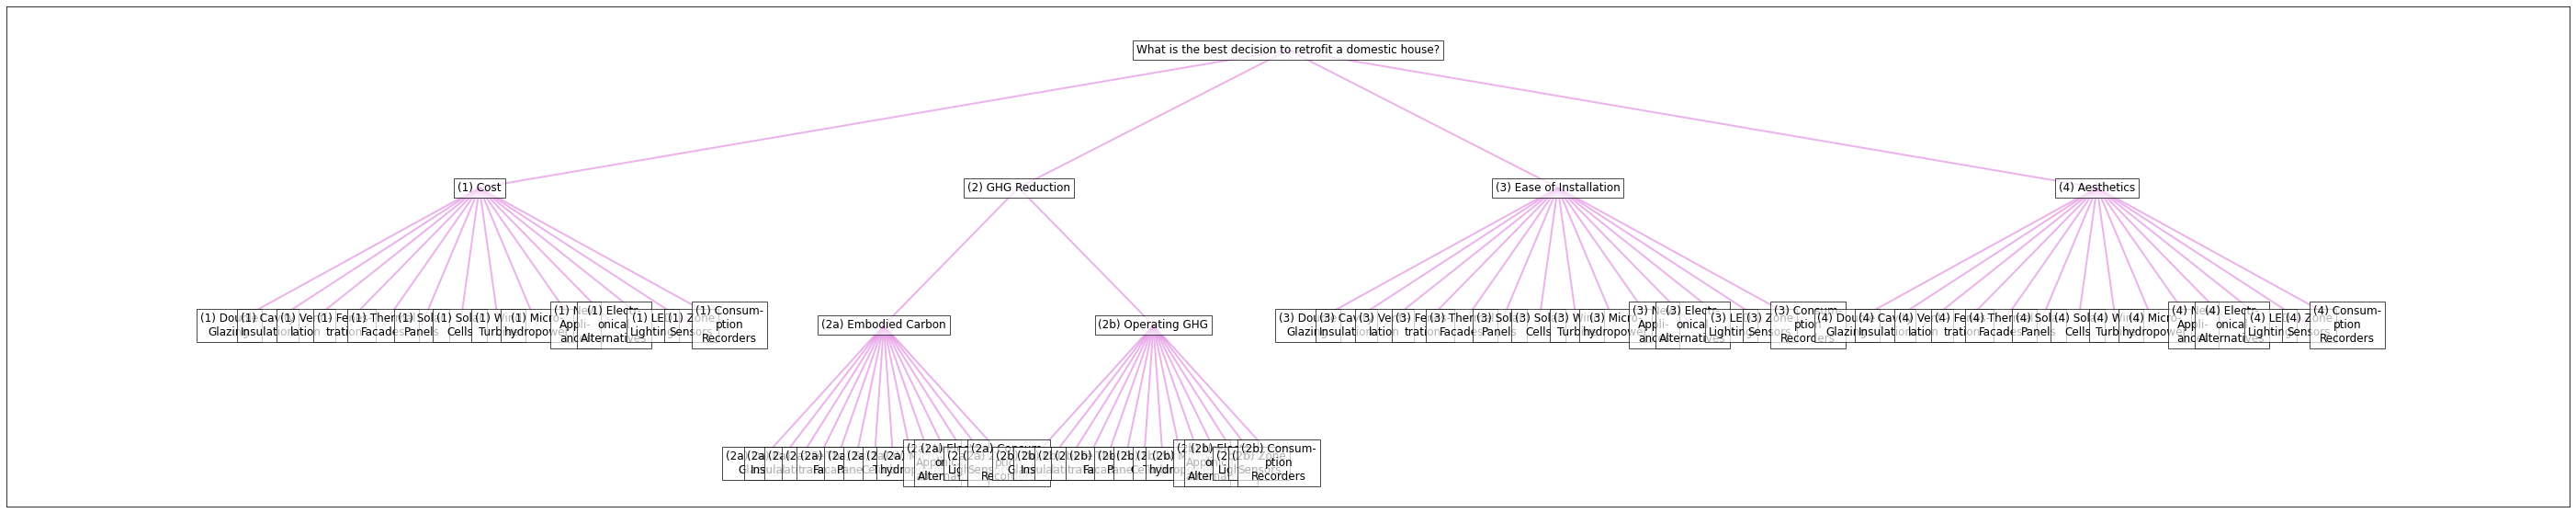

In [5]:
# Declares the edge list for generation of a visual aid representing the selected criteria, subcriteria, and alternatives
pretty_print = [alt.replace(' ', '\n') for alt in all_alts]
pretty_print[2], pretty_print[3], pretty_print[8], pretty_print[9], pretty_print[10], pretty_print[13] = 'Venti-\nlation', 'Fenes-\ntration', 'Micro-\nhydropower', 'New\nAppli-\nances', 'Electr-\nonical\nAlternatives', 'Consum-\nption\nRecorders'
root = 'What is the best decision to retrofit a domestic house?'

def generate_edges(level1_priorities=['', '', '', ''], level2_priorities=['','']):
    edges = []
    for i, c in enumerate(criteria):
        edges.append((root, f'({i+1}) {c}{level1_priorities[i]}'))
        if c == 'GHG Reduction':
            edges.append((f'({i+1}) {c}{level1_priorities[i]}', f'({i+1}a) Embodied Carbon{level2_priorities[0]}'))
            for a in pretty_print:
                edges.append((f'({i+1}a) Embodied Carbon{level2_priorities[0]}', f'({i+1}a) {a}'))
            edges.append((f'({i+1}) {c}{level1_priorities[i]}', f'({i+1}b) Operating GHG{level2_priorities[1]}'))
            for a in pretty_print:
                edges.append((f'({i+1}b) Operating GHG{level2_priorities[1]}', f'({i+1}b) {a}'))
        else:
            for a in pretty_print:
                edges.append((f'({i+1}) {c}{level1_priorities[i]}', f'({i+1}) {a}'))
    return edges
edges = generate_edges()

def display_ahp_graph(edges):
    G=nx.Graph()
    G.add_edges_from(edges)
    pos = hierarchy_pos(G,root)  
    color_map = ['green' if '(' in node else 'white' if ' ' in node else 'red' for node in G]    
    fig = plt.figure(1, figsize=(50, 10), dpi=72)
    nx.draw_networkx_edges(G, pos, alpha=0.3, width=2, edge_color="m")
    nx.draw_networkx_nodes(G, pos, node_size=0, node_color="#210070", alpha=0.9)
    label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
    nx.draw_networkx_labels(G, pos, font_size=12, bbox=label_options)
    plt.plot()
display_ahp_graph(edges)

# Step 3: Pairwise comparison of critier with respect to goal
## Level 1 - Generate initial comparisons

In [6]:
# generate comparisons
def criteria_comparisons(criteria, header='Criteria'):
    df = pd.DataFrame(list(combinations(criteria, 2)), columns=[header+' A', header+' B'])
    return df

table1 = criteria_comparisons(criteria)
table1

,Criteria A,Criteria B
0,Cost,GHG Reduction
1,Cost,Ease of Installation
2,Cost,Aesthetics
3,GHG Reduction,Ease of Installation
4,GHG Reduction,Aesthetics
5,Ease of Installation,Aesthetics


In [7]:
# generate survey table
nondecreasing = np.concatenate([np.linspace(9, 1, num=9, dtype=int), np.linspace(2, 9, num=8, dtype=int)])
def make_survey_visual_aid(table):
    ranks = []
    for idx, comparison in table.iterrows():
        ranks.append([comparison['Criteria A']] + nondecreasing.tolist() + [comparison['Criteria B']])
    importance = ['Extreme', '', 'Very Strong', '','Strong','', 'Moderate','', 'Equal']
    headers = [['']+['Importance']*17+[''], ['Criteria A']+importance + list(reversed(importance[:-1])) + ['Criteria B']]
    df = pd.DataFrame(ranks, columns=headers)
    df = df.style.set_table_styles([dict(selector='th', props=[('text-align', 'center'), ('width', '5em')])]).hide_index()
    return df
table2 = make_survey_visual_aid(table1)
table2

## Aside 1: Non-linear Relative importance

/tmp/ipykernel_31354/2218809494.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(a-1, 1/a, c='blue')
/tmp/ipykernel_31354/2218809494.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(-a+1, 1/a, c='blue')


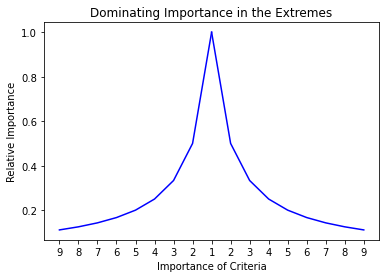

In [8]:
# plot importance non-linearity
a = np.linspace(0, 9, num=17, dtype=int)
plt.plot(a-1, 1/a, c='blue')
plt.plot(-a+1, 1/a, c='blue')
plt.xticks(np.concatenate([np.linspace(-8, -1, num=8, dtype=int), [0], np.linspace(1, 8, num=8, dtype=int)]), list(map(str,nondecreasing)))
plt.xlabel('Importance of Criteria')
plt.ylabel('Relative Importance')
plt.title('Dominating Importance in the Extremes')
plt.show()

In [9]:
# generate aside survey table
ranks = []
nondecreasing100 = np.floor(((np.concatenate([np.linspace(9, 1, num=9, dtype=int), np.linspace(2, 9, num=8, dtype=int)])**2)/81)*100).astype(int)
for idx, comparison in table1.iterrows():
    ranks.append([comparison['Criteria A']] + nondecreasing100.tolist() + [comparison['Criteria B']])
importance = ['Extreme', '', 'Very Strong', '','Strong','', 'Moderate','', 'Equal']
headers = [['']+['Importance']*17+[''], ['Criteria A']+importance + list(reversed(importance[:-1])) + ['Criteria B']]
table3 = pd.DataFrame(ranks, columns=headers)
table3 = table3.style.set_table_styles([dict(selector='th', props=[('text-align', 'center'), ('width', '5em')])]).hide_index()
table3

# Step 4: Check for consistancy
## Generate Comparison Matrix

In [11]:
# encode into comparison matrix
matrix = pd.DataFrame(np.identity(len(criteria)), criteria, columns=criteria)
matrix['Aesthetics']['GHG Reduction'] = 6
matrix['Aesthetics']['Cost'] = 1/4
matrix['Cost']['Ease of Installation'] = 2
matrix['Cost']['GHG Reduction'] = 9
matrix['Ease of Installation']['GHG Reduction'] = 7
matrix['Ease of Installation']['Aesthetics'] = 5

def match_triganular(matrix, criteria):
    for x in criteria:
        for y in criteria:
            if x == y: next
            if matrix[x][y] == 0:
                matrix[x][y] = 1/matrix[y][x]
            elif matrix[y][x] == 0:
                matrix[y][x] = 1/matrix[x][y]
    return matrix

matrix = match_triganular(matrix, criteria)
matrix

,Cost,GHG Reduction,Ease of Installation,Aesthetics
Cost,1.0,0.111111,0.5,0.25
GHG Reduction,9.0,1.000000,7.0,6.00
Ease of Installation,2.0,0.142857,1.0,0.20
Aesthetics,4.0,0.166667,5.0,1.00


## Calculation of CI

In [12]:
# eigen values and vectors
eig_vals, eig_vecs = np.linalg.eig(matrix.values)
peval, pevec = np.real(eig_vals[0]), np.real(eig_vecs[:,0])
print(peval, pevec)

4.264961700524608 [-0.07026529 -0.94853639 -0.10238912 -0.29130392]


In [13]:
# normalised principal eigen vector
level1_local_priority = pevec/np.sum(pevec)
level1_local_priority

array([0.04974552, 0.6715327 , 0.07248814, 0.20623364])

$\text{CI} = \frac{\lambda_{\text{max}} - n}{n-1} = \frac{4.264961700524608 - 4}{4-1}$

In [14]:
# calculate CI
CI = (peval - 4) / (4 - 1)
CI

0.08832056684153589

In [15]:
# calculate CR using RI from lecture
RI = 0.9
CI/RI

0.0981339631572621

## Aside 2: Prove Random Consistency Index (RI) for fun

In [16]:
options = np.concatenate([1/np.linspace(9, 1, num=9, dtype=int), np.linspace(2, 9, num=8, dtype=int)])
max_size = 15
n_intr = 10000

for i in range(2, max_size+1):
    total_CIs = 0
    for n in range(n_intr):
        dummy = np.identity(i)
        for criteria_i in range(i):
            for criteria_j in range(i):
                if dummy[criteria_j][criteria_i] == 0:
                    dummy[criteria_i][criteria_j] = options[np.random.randint(len(options))]
        dummy = match_triganular(pd.DataFrame(dummy), range(i))
        pevals, _ = np.linalg.eig(dummy.values)
        total_CIs += (np.real(pevals[0]) - i) / (i - 1)
    print('Matrix size:', i, 'RI:', np.round(total_CIs/n_intr, 2))
# dummy

Matrix size: 2 RI: 0.0
Matrix size: 3 RI: 0.7
Matrix size: 4 RI: 0.7
Matrix size: 5 RI: 1.12
Matrix size: 6 RI: 1.31
Matrix size: 7 RI: 1.29
Matrix size: 8 RI: 1.37
Matrix size: 9 RI: 1.4
Matrix size: 10 RI: 1.47
Matrix size: 11 RI: 1.47
Matrix size: 12 RI: 1.61
Matrix size: 13 RI: 1.4
Matrix size: 14 RI: 1.53
Matrix size: 15 RI: 1.53


# Step 5: Evaluate alternatives according to criteria

## Level 2 - Defining Embodied Carbon vs Operating GHG Emission importance

In [17]:
# generate survey table for level 2
ghg_subcriteria = ['Embodied Carbon (tonne CO2e)','Operating GHG (g/kWh)']
make_survey_visual_aid(criteria_comparisons(ghg_subcriteria))

In [18]:
# encode comparisons matrix
ghg_matrix = pd.DataFrame(np.identity(len(ghg_subcriteria)), ghg_subcriteria, columns=ghg_subcriteria)
ghg_matrix['Embodied Carbon (tonne CO2e)']['Operating GHG (g/kWh)'] = 2
ghg_matrix['Operating GHG (g/kWh)']['Embodied Carbon (tonne CO2e)'] = 1/2
ghg_matrix

,Embodied Carbon (tonne CO2e),Operating GHG (g/kWh)
Embodied Carbon (tonne CO2e),1.0,0.5
Operating GHG (g/kWh),2.0,1.0


In [19]:
# calculate local priorty
def calculate_consistancy(matrix, RI=1.57, output=False):
    eig_vals, eig_vecs = np.linalg.eig(matrix.values)
    peval, pevec = np.real(eig_vals[0]), np.real(eig_vecs[:,0])
    pevec_normalised = pevec/np.sum(pevec)
    CI = (peval - matrix.shape[0]) / (matrix.shape[0] - 1)
    CR = CI/RI
    if output: print('CI: ', CI, 'CR:', CR)
    return peval, pevec, pevec_normalised, CI, CR

# calculate level 2 priority
peval, pevec, level2_local_priority, CI, CR = calculate_consistancy(ghg_matrix, RI=0, output=False)
level2_local_priority

/tmp/ipykernel_31354/913479126.py:7: RuntimeWarning: invalid value encountered in double_scalars
  CR = CI/RI


array([0.33333333, 0.66666667])

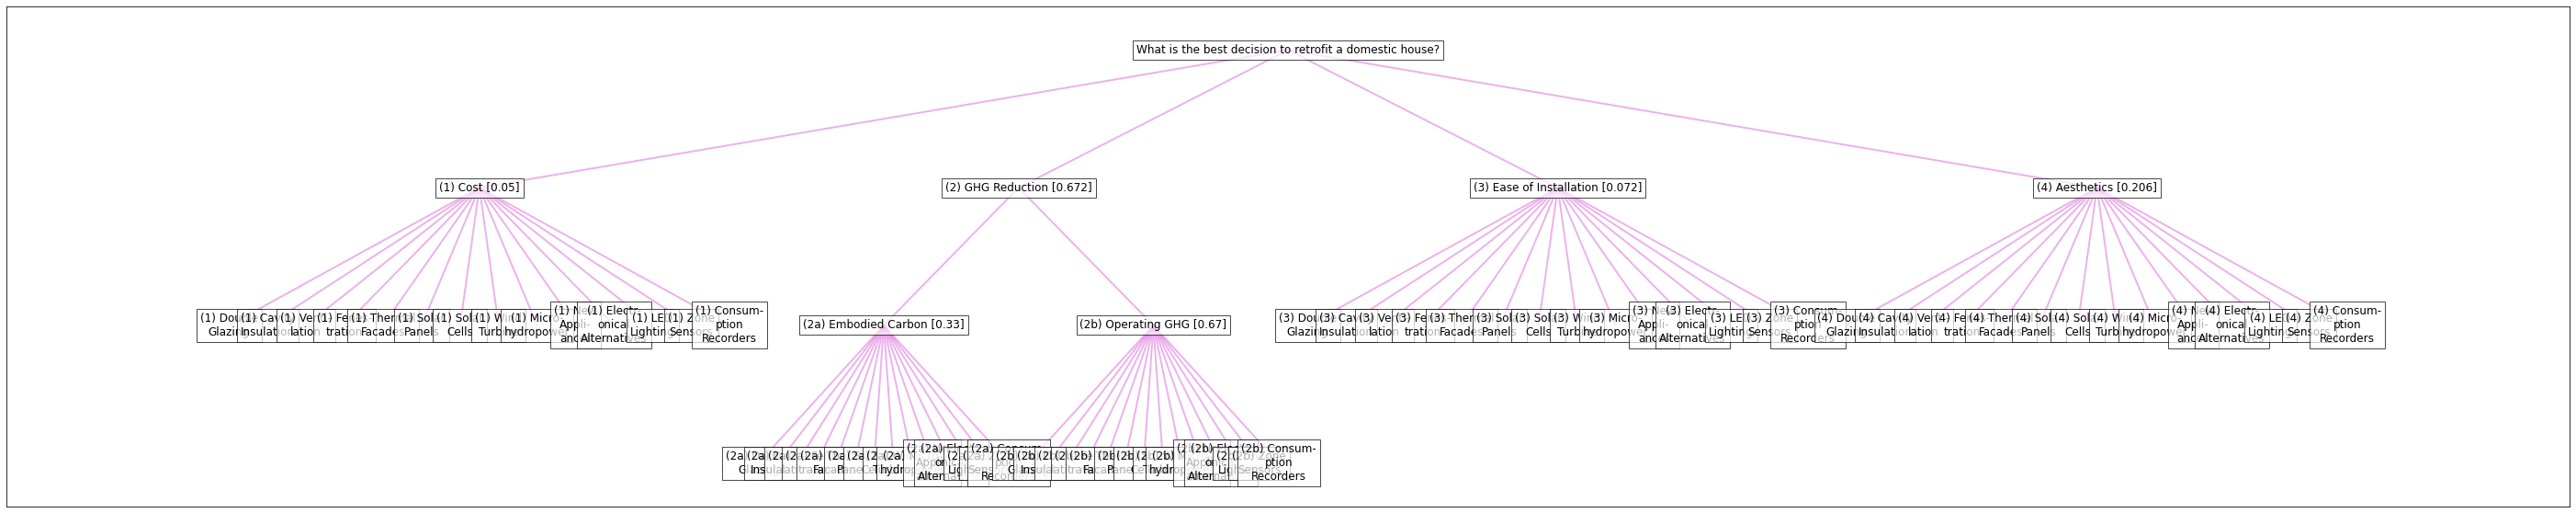

In [20]:
edges = generate_edges([f' [{v}]' for v in np.round(level1_local_priority, 3)], [f' [{v}]' for v in np.round(level2_local_priority, 2)])
display_ahp_graph(edges)

## Data gathering method

In [21]:
data = pd.read_csv('data.csv', index_col=0)
data

,Cost (£),Embodied Carbon (tonne CO2e),Operating GHG (g/kWh),Ease of Installation,Aesthetics
Double Glazing,8700.00,3.240,147.00,2,1
Cavity Insulation,475.00,13.440,171.50,2,1
Ventilation,3500.00,40.000,49.00,2,1
Fenestration,355948.00,80.000,24.50,1,1
Thermal Facades,9000.00,48.000,5.70,2,4
Solar Panels,2962.84,0.650,277.50,2,5
Solar Cells,5500.00,13.300,200.00,2,5
Wind Turbine,30715.20,10.880,200.00,1,5
Microhydropower,12096.00,3.916,200.00,1,5
New Appliances,7955.00,8.000,159.77,5,3


In [22]:
notes = pd.read_csv('notes.csv', index_col=0)
notes

,notes
Double Glazing,Assumption: 5 rooms of 3 3m2 glass windows
Cavity Insulation,"Assumption: 5 rooms of 56m2 wall surface area,..."
Ventilation,None
Fenestration,"Not possible without a rebuild, price is avera..."
Thermal Facades,Averaged efficecy of materials in paper = 3%
Solar Panels,"USD converted to GBP, CO2e per kWh of heat"
Solar Cells,Using source's example of 12 panels 15-21m2
Wind Turbine,"UK avg usage estimated to 10kw, incl. tax, exc..."
Microhydropower,"5x 2kW turbines, incl. tax, excl. labour, excl..."
New Appliances,Source's average of appliances


## Level 3 - Conduct analytical comparison using data

In [23]:
level3_comparisons = criteria_comparisons(all_alts, 'Improvement')
level3_comparisons

,Improvement A,Improvement B
0,Double Glazing,Cavity Insulation
1,Double Glazing,Ventilation
2,Double Glazing,Fenestration
3,Double Glazing,Thermal Facades
4,Double Glazing,Solar Panels
...,...,...
86,Electronical Alternatives,Zone Sensors
87,Electronical Alternatives,Consumption Recorders
88,LED Lighting,Zone Sensors
89,LED Lighting,Consumption Recorders


In [24]:
# build explanation table
def build_comparison_table(df, criteria, quantity):
    df[f'Mean {criteria} for Improvement A'] = data[f'{criteria}'][df['Improvement A']].values
    df[f'Mean {criteria} for Improvement B'] = data[f'{criteria}'][df['Improvement B']].values
    df[f'Better {quantity}'] = df[f'Mean {criteria} for Improvement A'] > df[f'Mean {criteria} for Improvement B']
    df.loc[(df[f'Better {quantity}'] == True),  'Better By Ratio'] = df.loc[(df[f'Better {quantity}'] == True )][f'Mean {criteria} for Improvement A']/df.loc[(df[f'Better {quantity}'] == True )][f'Mean {criteria} for Improvement B']
    df.loc[(df[f'Better {quantity}'] == False), 'Better By Ratio'] = df.loc[(df[f'Better {quantity}'] == False)][f'Mean {criteria} for Improvement B']/df.loc[(df[f'Better {quantity}'] == False)][f'Mean {criteria} for Improvement A']
    df.loc[(df[f'Better {quantity}'] == True),  f'Better {quantity}']    = df.loc[(df[f'Better {quantity}'] == True )]['Improvement A']
    df.loc[(df[f'Better {quantity}'] == False), f'Better {quantity}']    = df.loc[(df[f'Better {quantity}'] == False)]['Improvement B']
    df[f'{quantity} Difference'] = np.abs(df[f'Mean {criteria} for Improvement A'] - df[f'Mean {criteria} for Improvement B'])
    df['Intensity'] = np.minimum(np.round((9*df['Better By Ratio'].values)/2.5), np.repeat(9, len(df['Better By Ratio'].values)))
    return df
cost_table = build_comparison_table(level3_comparisons, 'Cost (£)', 'Price')
cost_table

,Improvement A,Improvement B,Mean Cost (£) for Improvement A,Mean Cost (£) for Improvement B,Better Price,Better By Ratio,Price Difference,Intensity
0,Double Glazing,Cavity Insulation,8700.0,475.00,Double Glazing,18.315789,8225.00,9.0
1,Double Glazing,Ventilation,8700.0,3500.00,Double Glazing,2.485714,5200.00,9.0
2,Double Glazing,Fenestration,8700.0,355948.00,Fenestration,40.913563,347248.00,9.0
3,Double Glazing,Thermal Facades,8700.0,9000.00,Thermal Facades,1.034483,300.00,4.0
4,Double Glazing,Solar Panels,8700.0,2962.84,Double Glazing,2.936372,5737.16,9.0
...,...,...,...,...,...,...,...,...
86,Electronical Alternatives,Zone Sensors,3000.0,640.90,Electronical Alternatives,4.680917,2359.10,9.0
87,Electronical Alternatives,Consumption Recorders,3000.0,200.00,Electronical Alternatives,15.000000,2800.00,9.0
88,LED Lighting,Zone Sensors,174.2,640.90,Zone Sensors,3.679104,466.70,9.0
89,LED Lighting,Consumption Recorders,174.2,200.00,Consumption Recorders,1.148106,25.80,4.0


In [25]:
# build comparison matrix from result
def build_comparison_matrix(table, critiera, quantity):
    matrix = pd.DataFrame(np.identity(len(critiera)), critiera, columns=critiera)
    for idx, comparison in table.iterrows():
        if comparison['Improvement A'] is comparison[f'Better {quantity}']:
            matrix.loc[comparison['Improvement A'], comparison['Improvement B']] = comparison['Intensity']
        else:
            matrix.loc[comparison['Improvement B'], comparison['Improvement A']] = comparison['Intensity']
    matrix = match_triganular(matrix, all_alts)
    return matrix
cost_matrix = build_comparison_matrix(cost_table, all_alts, 'Price')
cost_matrix

,Double Glazing,Cavity Insulation,Ventilation,Fenestration,Thermal Facades,Solar Panels,Solar Cells,Wind Turbine,Microhydropower,New Appliances,Electronical Alternatives,LED Lighting,Zone Sensors,Consumption Recorders
Double Glazing,1.000000,9.000000,9.000000,0.111111,0.250000,9.000000,6.000000,0.111111,0.200000,4.000000,9.000000,9.0,9.000000,9.00
Cavity Insulation,0.111111,1.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,9.0,0.200000,9.00
Ventilation,0.111111,9.000000,1.000000,0.111111,0.111111,4.000000,0.166667,0.111111,0.111111,0.125000,4.000000,9.0,9.000000,9.00
Fenestration,9.000000,9.000000,9.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.00
Thermal Facades,4.000000,9.000000,9.000000,0.111111,1.000000,9.000000,6.000000,0.111111,0.200000,4.000000,9.000000,9.0,9.000000,9.00
Solar Panels,0.111111,9.000000,0.250000,0.111111,0.111111,1.000000,0.142857,0.111111,0.111111,0.111111,0.250000,9.0,9.000000,9.00
Solar Cells,0.166667,9.000000,6.000000,0.111111,0.166667,7.000000,1.000000,0.111111,0.125000,0.200000,7.000000,9.0,9.000000,9.00
Wind Turbine,9.000000,9.000000,9.000000,0.111111,9.000000,9.000000,9.000000,1.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.00
Microhydropower,5.000000,9.000000,9.000000,0.111111,5.000000,9.000000,8.000000,0.111111,1.000000,5.000000,9.000000,9.0,9.000000,9.00
New Appliances,0.250000,9.000000,8.000000,0.111111,0.250000,9.000000,5.000000,0.111111,0.200000,1.000000,9.000000,9.0,9.000000,9.00


In [26]:
peval, pevec, pevec_normalised, CI, CR = calculate_consistancy(cost_matrix)
def build_priority_order_table(criteria, pevec_normalised):
    order = np.array(criteria)[pevec_normalised.argsort()]
    return pd.DataFrame(np.sort(pevec_normalised)[::-1], order, columns=['Priority Order'])
level3_priority_cost = build_priority_order_table(all_alts, pevec_normalised)
level3_priority_cost

,Priority Order
LED Lighting,0.300465
Consumption Recorders,0.211301
Cavity Insulation,0.117553
Zone Sensors,0.087342
Solar Panels,0.074216
Electronical Alternatives,0.060230
Ventilation,0.042692
Solar Cells,0.028007
New Appliances,0.023724
Double Glazing,0.020159


### Ease of Installation

In [27]:
level3_comparisons = criteria_comparisons(all_alts, 'Improvement')
ease_of_installation_table = build_comparison_table(level3_comparisons, 'Ease of Installation', 'Ease')
ease_of_installation_matrix = build_comparison_matrix(ease_of_installation_table, all_alts, 'Ease')
peval, pevec, pevec_normalised, CI, CR = calculate_consistancy(ease_of_installation_matrix.T)
level3_priority_eoi = build_priority_order_table(all_alts, pevec_normalised)
level3_priority_eoi

,Priority Order
LED Lighting,0.245006
Electronical Alternatives,0.202287
New Appliances,0.167016
Zone Sensors,0.084092
Consumption Recorders,0.069430
Solar Cells,0.057324
Solar Panels,0.047329
Thermal Facades,0.039077
Ventilation,0.032263
Cavity Insulation,0.019519


### Aesthetics

In [28]:
level3_comparisons = criteria_comparisons(all_alts, 'Improvement')
aesthetics_table = build_comparison_table(level3_comparisons, 'Aesthetics', 'Prettiness')
aesthetics_matrix = build_comparison_matrix(aesthetics_table, all_alts, 'Prettiness')
peval, pevec, pevec_normalised, CI, CR = calculate_consistancy(aesthetics_matrix)
level3_priority_aesthetics = build_priority_order_table(all_alts, pevec_normalised)
level3_priority_aesthetics

,Priority Order
Double Glazing,0.221692
Cavity Insulation,0.183014
Ventilation,0.151085
Fenestration,0.124725
Zone Sensors,0.094140
Consumption Recorders,0.066033
LED Lighting,0.054513
New Appliances,0.034570
Electronical Alternatives,0.017927
Thermal Facades,0.014799


### Embodied Carbon (tonne $\text{CO}_2\text{e}$)

In [29]:
level3_comparisons = criteria_comparisons(all_alts, 'Improvement')
ghg_table = build_comparison_table(level3_comparisons, 'Embodied Carbon (tonne CO2e)', 'Emissions')
ghg_matrix = build_comparison_matrix(ghg_table, all_alts, 'Emissions')
peval, pevec, pevec_normalised, CI, CR = calculate_consistancy(ghg_matrix)
level3_priority_embodied_carbon = build_priority_order_table(all_alts, pevec_normalised)
level3_priority_embodied_carbon

,Priority Order
LED Lighting,0.272372
Zone Sensors,0.194355
Consumption Recorders,0.164578
Solar Panels,0.084359
Double Glazing,0.071548
Microhydropower,0.057465
New Appliances,0.042996
Electronical Alternatives,0.036467
Wind Turbine,0.023234
Solar Cells,0.019604


### Reduction in Operating GHG (g/kWh)

In [30]:
level3_comparisons = criteria_comparisons(all_alts, 'Improvement')
ghg_table = build_comparison_table(level3_comparisons, 'Operating GHG (g/kWh)', 'CO2e')
ghg_matrix = build_comparison_matrix(ghg_table, all_alts, 'CO2e')
peval, pevec, pevec_normalised, CI, CR = calculate_consistancy(ghg_matrix.T)
level3_priority_operating_ghg = build_priority_order_table(all_alts, pevec_normalised)
level3_priority_operating_ghg

,Priority Order
Solar Panels,0.322125
Microhydropower,0.175342
Wind Turbine,0.134787
Solar Cells,0.112753
Cavity Insulation,0.074266
New Appliances,0.062125
Double Glazing,0.029135
LED Lighting,0.022241
Zone Sensors,0.018338
Ventilation,0.014024


# Step 6: Make a decision

In [31]:
df = pd.concat([
    level1_local_priority[0]*level3_priority_cost,
    level1_local_priority[1]*level2_local_priority[0]*level3_priority_embodied_carbon,
    level1_local_priority[1]*level2_local_priority[1]*level3_priority_operating_ghg,
    level1_local_priority[2]*level3_priority_eoi,
    level1_local_priority[3]*level3_priority_aesthetics], axis=1)
df['Total'] = df.sum(axis=1)
df = df.sort_values(by='Total', ascending=False)
df.columns = [['']+['GHG Emissions']*2+['']*3, ['Cost (£)','Embodied Carbon (tonne CO2e)', 'Operating GHG (g/kWh)', 'Ease of Installation', 'Aesthetics', 'Total']]
print(df.sum().to_latex())

\begin{tabular}{llr}
\toprule
              &       &         0 \\
\midrule
{} & Cost (£) &  0.049746 \\
GHG Emissions & Embodied Carbon (tonne CO2e) &  0.223844 \\
              & Operating GHG (g/kWh) &  0.447688 \\
              & Ease of Installation &  0.072488 \\
              & Aesthetics &  0.206234 \\
              & Total &  1.000000 \\
\bottomrule
\end{tabular}



In [32]:
print(df.to_latex())
# pd.DataFrame(df.sum(axis=1))

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{5}{l}{GHG Emissions} \\
{} &  Cost (£) & Embodied Carbon (tonne CO2e) & Operating GHG (g/kWh) & Ease of Installation & Aesthetics &     Total \\
\midrule
Solar Panels              &  0.003692 &                     0.018883 &              0.144211 &             0.003431 &   0.002520 &  0.172737 \\
LED Lighting              &  0.014947 &                     0.060969 &              0.009957 &             0.017760 &   0.011242 &  0.114875 \\
Microhydropower           &  0.000508 &                     0.012863 &              0.078499 &             0.000702 &   0.001418 &  0.093990 \\
Zone Sensors              &  0.004345 &                     0.043505 &              0.008210 &             0.006096 &   0.019415 &  0.081570 \\
Cavity Insulation         &  0.005848 &                     0.003050 &              0.033248 &             0.001415 &   0.037744 &  0.081305 \\
Double Glazing            &  0.001003 &                     0.016016 &    

### Graph Positioning Code
Only code that isn't mine! It sets the graph to draw as a hierarchy like in the lecture slides. Written by [Joel C. Millar](http://scholar.harvard.edu/joelmiller) at Harvard, uploaded to [stackoverflow](https://stackoverflow.com/questions/29586520/can-one-get-hierarchical-graphs-from-networkx-with-python-3).

In [41]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)